In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%matplotlib inline

In [2]:
# index_col parameter required as the csv has an Id field that shouldn't be considered a feature 
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>Remove outliners from home_prices_data_exploration notebook</h2>

In [4]:
train = train.drop([1299, 524,333])

In [5]:
def preparaData(data):
    #numeric features:
    numeric_feats =data.dtypes[data.dtypes != "object"].index
    #log transform only numeric features:
    #skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
    #skewed_feats = skewed_feats[skewed_feats > 0.75]
    
    data[numeric_feats] = np.log1p(data[numeric_feats]) # log transform data
    
    data = pd.get_dummies(data,dummy_na=True) # One hot encode categorical data including encoding NAs
    
    data = data.fillna(all_data.mean()) #filling NA's with the mean of the column:
    
    return data

In [6]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [7]:
all_data[['MoSold', 'MSSubClass']] = all_data[['MoSold', 'MSSubClass']].astype('object')

In [8]:
all_data = all_data.loc[:,'MSSubClass':'SaleCondition']
all_data = preparaData(all_data)
all_data[:10]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,5.017280,...,0,1,0,0,0,0,0,1,0,0
1,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,5.652489,...,0,1,0,0,0,0,0,1,0,0
2,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,6.075346,...,0,1,0,0,0,0,0,1,0,0
3,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,6.293419,...,0,1,0,1,0,0,0,0,0,0
4,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,6.196444,...,0,1,0,0,0,0,0,1,0,0
5,4.454347,9.555064,1.791759,1.791759,7.597898,7.598900,0.000000,6.597146,0.000000,4.174387,...,0,1,0,0,0,0,0,1,0,0
6,4.330733,9.218804,2.197225,1.791759,7.603399,7.603898,5.231109,7.222566,0.000000,5.762051,...,0,1,0,0,0,0,0,1,0,0
7,4.196010,9.247925,2.079442,1.945910,7.587817,7.587817,5.484797,6.756932,3.496508,5.379897,...,0,1,0,0,0,0,0,1,0,0
8,3.951244,8.719481,2.079442,1.791759,7.566311,7.576097,0.000000,0.000000,0.000000,6.859615,...,0,1,0,1,0,0,0,0,0,0
9,3.931826,8.912069,1.791759,1.945910,7.570443,7.576097,0.000000,6.747587,0.000000,4.948760,...,0,1,0,0,0,0,0,1,0,0


In [9]:
all_training_data = all_data[:train.shape[0]]
all_testing_data = all_data[train.shape[0]:]
all_training_label = np.log1p(train["SalePrice"])

In [10]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(all_training_data, all_training_label, test_size=0.1,random_state=42)

In [11]:
#features_train[:10]
features_train.isnull().any()

LotFrontage              False
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrArea               False
BsmtFinSF1               False
BsmtFinSF2               False
BsmtUnfSF                False
TotalBsmtSF              False
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath             False
BsmtHalfBath             False
FullBath                 False
HalfBath                 False
BedroomAbvGr             False
KitchenAbvGr             False
TotRmsAbvGrd             False
Fireplaces               False
GarageYrBlt              False
GarageCars               False
GarageArea               False
WoodDeckSF               False
OpenPorchSF              False
EnclosedPorch            False
3SsnPorch                False
                         ...  
MoSold_1.0               False
MoSold_2

In [12]:
labels_train[:10]

907     12.429220
1313    12.716405
382     12.271397
1119    11.803361
809     11.571204
128     11.951187
530     12.072547
910     11.946661
652     12.160034
1450    11.820418
Name: SalePrice, dtype: float64

In [13]:
# Making sure our 2 converted columns are one-hot encoded
print(features_train.filter(like='MSSubClass').columns)
print(features_train.filter(like='MoSold').columns)

Index(['MSSubClass_20.0', 'MSSubClass_30.0', 'MSSubClass_40.0',
       'MSSubClass_45.0', 'MSSubClass_50.0', 'MSSubClass_60.0',
       'MSSubClass_70.0', 'MSSubClass_75.0', 'MSSubClass_80.0',
       'MSSubClass_85.0', 'MSSubClass_90.0', 'MSSubClass_120.0',
       'MSSubClass_150.0', 'MSSubClass_160.0', 'MSSubClass_180.0',
       'MSSubClass_190.0', 'MSSubClass_nan'],
      dtype='object')
Index(['MoSold_1.0', 'MoSold_2.0', 'MoSold_3.0', 'MoSold_4.0', 'MoSold_5.0',
       'MoSold_6.0', 'MoSold_7.0', 'MoSold_8.0', 'MoSold_9.0', 'MoSold_10.0',
       'MoSold_11.0', 'MoSold_12.0', 'MoSold_nan'],
      dtype='object')


In [14]:
def drawPredictionAgainstReality(pred,reality):
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10) 

    fig, ax = plt.subplots(figsize=(5, 5))

    plt.style.use('ggplot')
    plt.plot(pred, reality, 'ro')
    plt.xlabel('Predictions', fontsize = 10)
    plt.ylabel('Reality', fontsize = 10)
    plt.title('Predictions x Reality on dataset Test', fontsize = 15)
    ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
    plt.show()

In [15]:
from IPython.display import FileLink, FileLinks
def generateOutputFile(preds,fileName):
    print(len(test.index))
    print(len(preds))
    my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': preds})
    my_submission.to_csv("../submissions/" + fileName, index=False)
    FileLink("../submissions/" + fileName)

In [28]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import keras

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=359, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    #opt = keras.optimizers.RMSprop(lr=0.01)
    opt = keras.optimizers.Adam(lr=0.005)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [29]:
# evaluate model with standardized dataset
from keras.callbacks import TensorBoard
from time import time

estimator = KerasRegressor(build_fn = baseline_model,epochs=500,batch_size=100)
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
estimator.fit( features_train, labels_train,callbacks=[tensorboard])
pred_y = estimator.predict( features_test )
r2 = r2_score( labels_test, pred_y )
rmse = mean_squared_error( labels_test, pred_y )
print( "KERAS: R2 : {0:f}, RMSE : {1:f}".format( r2, rmse ) )

Epoch 1/500
1311/1311 [==============================] - 0s 99us/step - loss: 106.4403
Epoch 2/500
1311/1311 [==============================] - 0s 37us/step - loss: 40.5689
Epoch 3/500
1311/1311 [==============================] - 0s 32us/step - loss: 28.5448
Epoch 4/500
1311/1311 [==============================] - 0s 37us/step - loss: 24.1978
Epoch 5/500
1311/1311 [==============================] - 0s 31us/step - loss: 20.9509
Epoch 6/500
1311/1311 [==============================] - 0s 33us/step - loss: 22.6426
Epoch 7/500
1311/1311 [==============================] - 0s 33us/step - loss: 20.8275

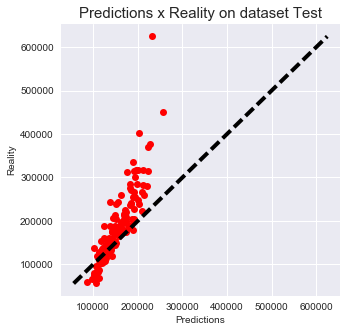

In [19]:
drawPredictionAgainstReality(np.expm1(pred_y),np.expm1(labels_test))

In [47]:
generateOutputFile(np.expm1(estimator.predict(all_testing_data)),"keras-model.csv")

1459
1459


In [91]:
def neural_network(size1 = 100, size2 = 50, size3 = 25):
    model = Sequential()
    model.add(Dense(size1, input_dim = 359, init = 'normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(size2, init = 'normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(size3, init = 'normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, init = 'normal'))
    model.compile(loss = 'mae', optimizer = 'adam', metrics = ["mae"])
    return(model)


In [92]:
from sklearn.model_selection import GridSearchCV

NN_grid = KerasRegressor(build_fn=neural_network, batch_size = 128, nb_epoch = 60, verbose = 1)
size1 = [100, 50, 30]
size2 = [50, 25, 15, 15]
size3 = [25, 12, 8, 8]


estimator = GridSearchCV(estimator = NN_grid, param_grid = {
        'size1': size1,
        'size2': size2,
        'size3': size3,
    }, cv = 5)
estimator.fit( features_train, labels_train)

Epoch 1/1
1048/1048 [==============================] - 0s 17us/step
Epoch 1/1
1049/1049 [==============================] - 0s 17us/step
Epoch 1/1
1049/1049 [==============================] - 0s 27us/step
Epoch 1/1
1049/1049 [==============================] - 0s 16us/step
Epoch 1/1
1049/1049 [==============================] - 0s 19us/step
Epoch 1/1
1048/1048 [==============================] - 0s 14us/step
Epoch 1/1
1049/1049 [==============================] - 0s 16us/step
Epoch 1/1
1049/1049 [==============================] - 0s 16us/step
Epoch 1/1
1049/1049 [==============================] - 0s 18us/step

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x13cbe3fd0>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'size1': [100, 50, 30], 'size2': [50, 25, 15, 15], 'size3': [25, 12, 8, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)